In [248]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt


# clf
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# split
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import accuracy_score


In [249]:
dfTrain = pd.read_csv('datasets/titanic/train.csv')
dfTest = pd.read_csv('datasets/titanic/test.csv')

In [250]:
# sort in to data/labels
dfTrainLabels = dfTrain['Survived']
dfTrain.drop('Survived', axis=1, inplace=True)
dfTrain

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [251]:
dfTest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [252]:
# random forest classifier with hyperparams set
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [253]:
dfTrain['Sex'].replace('male', 0, inplace=True)
dfTrain['Sex'].replace('female', 1, inplace=True)

# This makes it less accurate #
# dfTrain['Embarked'].fillna('NaN', inplace=True)
# print(dfTrain['Embarked'].unique())

# le = preprocessing.LabelEncoder()
# le.fit(dfTrain['Embarked'].unique())
# dfTrain['Embarked'] = le.transform(dfTrain['Embarked'])

# print(dfTrain['Embarked'])

#replace NaN with 0
dfTrain.fillna(0, inplace=True)

In [254]:
dfTrainFinal = dfTrain.filter(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])

In [255]:
# we need to test train split our training data to verify the model integrity
X_train, X_test, y_train, y_test = train_test_split(dfTrainFinal, dfTrainLabels, test_size=0.33, random_state=42)

In [256]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [257]:
y_pred = clf.predict(X_test)

In [258]:
accuracy_score(y_test, y_pred)

0.75593220338983047

In [259]:
clf.feature_importances_

array([ 0.03271463,  0.09954843,  0.38002089,  0.07389297,  0.02452746,
        0.00694897,  0.38234665])

Feature ranking:
1. feature Fare (0.382347)
2. feature Sex (0.380021)
3. feature Pclass (0.099548)
4. feature Age (0.073893)
5. feature PassengerId (0.032715)
6. feature SibSp (0.024527)
7. feature Parch (0.006949)


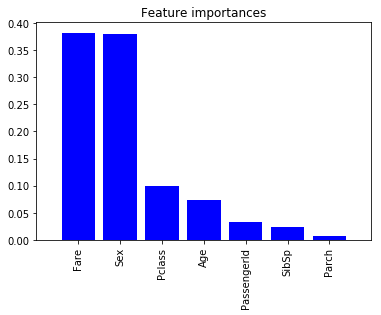

In [260]:
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
labels = X_train.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, labels[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), labels[indices])
plt.xlim([-1, X_train.shape[1]])

# Rotate the x axis labels
plt.xticks(rotation=90)
plt.show()

Unsurprisingly, fare and sex are the two greatest contributors to survival rate by far

In [261]:
clf = SVC()

In [262]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [263]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.60338983050847461

In [264]:
clf = SVC(kernel='sigmoid')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [265]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.59322033898305082

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

As usual SVC with a linear kernel is on the money. Let's fill in some more data.